<a href="https://colab.research.google.com/github/Lasitha99-star/Academic-Projects/blob/main/Zomato/Copy_of_zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving zomato_cleaned.csv to zomato_cleaned.csv


In [ ]:
import pandas as pd
import io
df=pd.read_csv(io.BytesIO(uploaded['zomato_cleaned.csv']))
#df=df.drop('cluster',axis=1)
df

In [ ]:
#for col in df.columns:
    #print(col)
list(df.columns)

In [ ]:
df=df.drop(['name','location','dish_liked','menu_item'],axis=1)
df

In [ ]:
df=df.drop(['Unnamed: 0'],axis=1)
df

In [ ]:
df.nunique()

In [ ]:
df['city'].unique()

In [ ]:
df['city'] = df['city'].replace(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], ["South","South","South","South East","Central","South","South","Central","South","North East","South East","East","South","South","North East",
                                        "North East","South East","South East","South East","South East","Central","West","South East","Central","North East",
                                        "East","West","Central","East","East"])

In [ ]:
df['cuisines'].unique()

In [ ]:
df.groupby(['cuisines'])['cuisines'].count()

In [ ]:
df1.isnull().sum()

In [ ]:
import missingno as msno

msno.matrix(df)

<ipython-input-13-281abf8f8633>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['rate'],kde=False)


<Axes: xlabel='rate'>

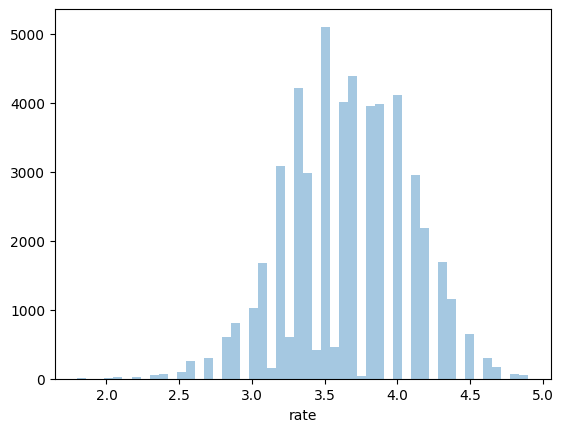

In [ ]:
import seaborn as sns
sns.distplot(df1['rate'],kde=False)

In [ ]:
import matplotlib.pyplot as plt
df1['rate'].plot(kind='hist',bins=15)

In [ ]:
df=pd.get_dummies(df,columns=['online_order','book_table','type','cuisines','eating_system','city'])

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

df_mice = df.filter(['online_order','book_table','votes','type','cuisines','cost_for_2_people','eating_system','city','rate'], axis=1).copy()

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)

In [ ]:
df=df_mice_imputed

In [ ]:
df

In [ ]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2)
impute_knn.fit_transform(df)

In [ ]:
df1=impute_knn.fit_transform(df)

In [ ]:
df1

array([[4.10e+00, 7.75e+02, 8.00e+02, ..., 1.00e+00, 0.00e+00, 0.00e+00],
       [4.10e+00, 7.87e+02, 8.00e+02, ..., 1.00e+00, 0.00e+00, 0.00e+00],
       [3.80e+00, 9.18e+02, 8.00e+02, ..., 1.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [3.25e+00, 0.00e+00, 2.00e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [4.30e+00, 2.36e+02, 2.50e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.40e+00, 1.30e+01, 1.50e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [ ]:
cols=['rate','votes','cost_for_2_people','online_order_No','online_order_Yes','book_table_No','book_table_Yes','type_Cafe','type_Casual Dining','type_Delivery','type_Dessert Parlor',
 'type_Multiple','type_Other','type_Quick Bites','cuisines_American','cuisines_Chinese','cuisines_Continental','cuisines_Desserts','cuisines_Indian','cuisines_Other','cuisines_multiple',
'eating_system_Buffet','eating_system_Cafes','eating_system_Delivery','eating_system_Desserts','eating_system_Dine-out','eating_system_Drinks & nightlife','eating_system_Pubs and bars',
'city_Central','city_East','city_North East','city_South','city_South East','city_West']

In [ ]:
df1=pd.DataFrame(df1,columns=['rate','votes','cost_for_2_people','online_order_No','online_order_Yes','book_table_No','book_table_Yes','type_Cafe','type_Casual Dining','type_Delivery',
 'type_Dessert Parlor','type_Multiple','type_Other','type_Quick Bites','cuisines_American','cuisines_Chinese','cuisines_Continental','cuisines_Desserts','cuisines_Indian','cuisines_Other',
 'cuisines_multiple','eating_system_Buffet','eating_system_Cafes',
 'eating_system_Delivery',
 'eating_system_Desserts',
 'eating_system_Dine-out',
 'eating_system_Drinks & nightlife',
 'eating_system_Pubs and bars',
 'city_Central',
 'city_East',
 'city_North East',
 'city_South',
 'city_South East',
 'city_West'])

In [ ]:
df1

,rate,votes,cost_for_2_people,online_order_No,online_order_Yes,book_table_No,book_table_Yes,type_Cafe,type_Casual Dining,type_Delivery,...,eating_system_Desserts,eating_system_Dine-out,eating_system_Drinks & nightlife,eating_system_Pubs and bars,city_Central,city_East,city_North East,city_South,city_South East,city_West
0,4.10,775.0,800.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4.10,787.0,800.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.80,918.0,800.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.70,88.0,300.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3.80,166.0,600.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,3.60,27.0,1500.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
51713,3.45,0.0,600.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
51714,3.25,0.0,2000.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
51715,4.30,236.0,2500.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
df2=impute_it.fit_transform(df)

In [ ]:
df2=pd.DataFrame(df2,columns=['rate','votes','cost_for_2_people','online_order_No','online_order_Yes','book_table_No','book_table_Yes','type_Cafe','type_Casual Dining','type_Delivery',
 'type_Dessert Parlor','type_Multiple','type_Other','type_Quick Bites','cuisines_American','cuisines_Chinese','cuisines_Continental','cuisines_Desserts','cuisines_Indian','cuisines_Other',
 'cuisines_multiple','eating_system_Buffet','eating_system_Cafes','eating_system_Delivery','eating_system_Desserts','eating_system_Dine-out','eating_system_Drinks & nightlife','eating_system_Pubs and bars','city_Central','city_East',
 'city_North East','city_South','city_South East','city_West'])

In [ ]:
df2

In [ ]:
sns.heatmap(df1.corr(),annot=True)
sns.set(rc={'figure.figsize':(200,200)})

In [ ]:
x=df1.drop(['cost_for_2_people'],axis=1)

In [ ]:
y=df3['cost_for_2_people']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

0.17447451794631563

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.5844619204532291

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor()
# Train the model on training data
rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_predrf = rf.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mserf = mean_squared_error(y_test,y_predrf)
mserf

0.04827099111018408